In [23]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
def get_files(file_location,pattern):
    """Retrieves correct files from results directory"""
    work_dir=file_location
    filenames=os.listdir(work_dir)
    data_frame=pd.DataFrame()
    actual_run_name=[] #the way files are saved now gives us 0-10, but we want to have the actual index+ run
    #loop over files
    for i in filenames:
        if len(re.findall(pattern,i))!=0:
            run=re.search("run\d",i).group()
            parameter_ind=int(re.search("\d*.csv",i).group()[:-4])

            data=pd.read_csv(work_dir+i,index_col=0)
            nrows,ncols=np.shape(data)
            index=[j+parameter_ind for j in range(ncols)]
            index=[run+"_"+str(k) for k in index]
            data.columns=index

            data_frame=pd.concat([data_frame,data],axis=1)
    return data_frame


def remove_failed_runs(experiment):
    #seeks runs where the training process failed
    # and removes NA values


    n_parameters=np.shape(experiment)[1]
    columns=list(experiment.columns)

    failed=np.where(experiment==-1)[1]
    failed=[columns[i] for i in failed]

    
    #exclude parameter initializations where the model ran into integration problems.
    exclude=np.setdiff1d(experiment.columns.to_list(),failed)
    experiment=experiment.filter(items=list(exclude),axis=1)

    #fill na values to 0: is this necessary?
    experiment.fillna(0,inplace=True)

    return experiment


def plot_loss_landscape(lpi_file,title="",yscale="linear"):
    """Plots the loss during training"""
    fig,ax=plt.subplots()
    for i in range(np.shape(lpi_file)[1]):
        ax.plot(lpi_file.iloc[:,i])
    if yscale=="log":
        plt.yscale("symlog")
    plt.title(title)
    plt.xlabel("Iteration")
    plt.xlim(0,np.shape(lpi_file)[0])
    plt.ylabel("Loss (MSE)")
    plt.show()

def get_succes_rate(lpi_file,lr_thresh=1e-3):
    """Get number of learnings that succeeeded"""
    lpi_file=np.array(lpi_file)
    not_failed=np.where(np.array(lpi_file)==-1)[1]
    nrows,ncols=np.shape(lpi_file)
    succeeded=np.where(lpi_file[nrows-1:]<lr_thresh)
    #take the difference between parameter sets that failed and the succeeded.
    succeeded=np.setdiff1d(succeeded,not_failed)
    return succeeded



def myplot(score,coeff,labels,title,var_explained):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1]*1.15 , "Var"+str(i+1), color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.title(title)
    plt.annotate("Var explained: "+str(np.round(var_explained,3)*100),xy=(0.4,0.75))
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()


In [24]:
#batch (4 parameters) uniform
batch_run1_lpi_uniform=get_files(file_location="../results/batch/uniform/",pattern="batch_run1_loss_per")
batch_run1_lpi_uniform=remove_failed_runs(batch_run1_lpi_uniform)
batch_run2_lpi_uniform=get_files(file_location="../results/batch/uniform/",pattern="batch_run2_loss_per")
batch_run2_lpi_uniform=remove_failed_runs(batch_run2_lpi_uniform)
batch_run3_lpi_uniform=get_files(file_location="../results/batch/uniform/",pattern="batch_run3_loss_per")
batch_run3_lpi_uniform=remove_failed_runs(batch_run3_lpi_uniform)

#batch (4 parameters) lhs
batch_run1_lpi_lhs=get_files(file_location="../results/batch/lhs/",pattern="batch_run1_loss_per")
batch_run1_lpi_lhs=remove_failed_runs(batch_run1_lpi_lhs)
batch_run2_lpi_lhs=get_files(file_location="../results/batch/lhs/",pattern="batch_run2_loss_per")
batch_run2_lpi_lhs=remove_failed_runs(batch_run2_lpi_lhs)
batch_run3_lpi_lhs=get_files(file_location="../results/batch/lhs/",pattern="batch_run3_loss_per")
batch_run3_lpi_lhs=remove_failed_runs(batch_run3_lpi_lhs)

#batch (4 parameters) minimax
batch_run1_lpi_minimax=get_files(file_location="../results/batch/minimax/",pattern="batch_run1_loss_per")
batch_run1_lpi_minimax=remove_failed_runs(batch_run1_lpi_minimax)
batch_run2_lpi_minimax=get_files(file_location="../results/batch/minimax/",pattern="batch_run2_loss_per")
batch_run2_lpi_minimax=remove_failed_runs(batch_run2_lpi_minimax)
batch_run3_lpi_minimax=get_files(file_location="../results/batch/minimax/",pattern="batch_run3_loss_per")
batch_run3_lpi_minimax=remove_failed_runs(batch_run3_lpi_minimax)


In [25]:
#BIOMD0000000507 (7 parameters) uniform
BIOMD0000000507_run1_lpi_uniform=get_files(file_location="../results/BIOMD0000000507/uniform/",pattern="BIOMD0000000507_run1_loss_per")
BIOMD0000000507_run1_lpi_uniform=remove_failed_runs(BIOMD0000000507_run1_lpi_uniform)
BIOMD0000000507_run2_lpi_uniform=get_files(file_location="../results/BIOMD0000000507/uniform/",pattern="BIOMD0000000507_run2_loss_per")
BIOMD0000000507_run2_lpi_uniform=remove_failed_runs(BIOMD0000000507_run2_lpi_uniform)
BIOMD0000000507_run3_lpi_uniform=get_files(file_location="../results/BIOMD0000000507/uniform/",pattern="BIOMD0000000507_run3_loss_per")
BIOMD0000000507_run3_lpi_uniform=remove_failed_runs(BIOMD0000000507_run3_lpi_uniform)


#BIOMD0000000507 (7 parameters) lhs
BIOMD0000000507_run1_lpi_lhs=get_files(file_location="../results/BIOMD0000000507/lhs/",pattern="BIOMD0000000507_run1_loss_per")
BIOMD0000000507_run1_lpi_lhs=remove_failed_runs(BIOMD0000000507_run1_lpi_lhs)
BIOMD0000000507_run2_lpi_lhs=get_files(file_location="../results/BIOMD0000000507/lhs/",pattern="BIOMD0000000507_run2_loss_per")
BIOMD0000000507_run2_lpi_lhs=remove_failed_runs(BIOMD0000000507_run2_lpi_lhs)
BIOMD0000000507_run3_lpi_lhs=get_files(file_location="../results/BIOMD0000000507/lhs/",pattern="BIOMD0000000507_run3_loss_per")
BIOMD0000000507_run3_lpi_lhs=remove_failed_runs(BIOMD0000000507_run3_lpi_lhs)

#BIOMD0000000507 (7 parameters) minimax
BIOMD0000000507_run1_lpi_minimax=get_files(file_location="../results/BIOMD0000000507/minimax/",pattern="BIOMD0000000507_run1_loss_per")
BIOMD0000000507_run1_lpi_minimax=remove_failed_runs(BIOMD0000000507_run1_lpi_minimax)
BIOMD0000000507_run2_lpi_minimax=get_files(file_location="../results/BIOMD0000000507/minimax/",pattern="BIOMD0000000507_run2_loss_per")
BIOMD0000000507_run2_lpi_minimax=remove_failed_runs(BIOMD0000000507_run2_lpi_minimax)
BIOMD0000000507_run3_lpi_minimax=get_files(file_location="../results/BIOMD0000000507/minimax/",pattern="BIOMD0000000507_run3_loss_per")
BIOMD0000000507_run3_lpi_minimax=remove_failed_runs(BIOMD0000000507_run3_lpi_minimax)

In [26]:
#monod (9 parameters) uniform
monod_run1_lpi_uniform=get_files(file_location="../results/monod/uniform/",pattern="monod_uni_run2_loss_per")
monod_run1_lpi_uniform=remove_failed_runs(monod_run1_lpi_uniform)
monod_run2_lpi_uniform=get_files(file_location="../results/monod/uniform/",pattern="monod_uni_run3_loss_per")
monod_run2_lpi_uniform=remove_failed_runs(monod_run2_lpi_uniform)
monod_run3_lpi_uniform=get_files(file_location="../results/monod/uniform/",pattern="monod_uni_run4_loss_per")
monod_run3_lpi_uniform=remove_failed_runs(monod_run3_lpi_uniform)


#monod (9 parameters) lhs
monod_run1_lpi_lhs=get_files(file_location="../results/monod/lhs/",pattern="monod_run2_loss_per")
monod_run1_lpi_lhs=remove_failed_runs(monod_run1_lpi_lhs)
monod_run2_lpi_lhs=get_files(file_location="../results/monod/lhs/",pattern="monod_run3_loss_per")
monod_run2_lpi_lhs=remove_failed_runs(monod_run2_lpi_lhs)
monod_run3_lpi_lhs=get_files(file_location="../results/monod/lhs/",pattern="monod_run4_loss_per")
monod_run3_lpi_lhs=remove_failed_runs(monod_run3_lpi_lhs)

#monod (9 parameters) minimax
monod_run1_lpi_minimax=get_files(file_location="../results/monod/minimax/",pattern="monod_run2_loss_per")
monod_run1_lpi_minimax=remove_failed_runs(monod_run1_lpi_minimax)
monod_run2_lpi_minimax=get_files(file_location="../results/monod/minimax/",pattern="monod_run4_loss_per")
monod_run2_lpi_minimax=remove_failed_runs(monod_run2_lpi_minimax)
monod_run3_lpi_minimax=get_files(file_location="../results/monod/minimax/",pattern="monod_run5_loss_per")
monod_run3_lpi_minimax=remove_failed_runs(monod_run3_lpi_minimax)

In [27]:
monod_run2_lpi_uniform

,run3_0,run3_1,run3_10,run3_11,run3_12,run3_13,run3_14,run3_15,run3_16,run3_17,...,run3_90,run3_91,run3_92,run3_93,run3_94,run3_95,run3_96,run3_97,run3_98,run3_99
0,0.130890,0.040736,0.043972,0.023929,0.016883,0.001625,0.114091,0.165952,0.159421,0.196644,...,0.078532,0.022457,0.029376,0.010938,0.007930,0.013307,0.001354,0.170526,0.136834,0.057672
1,0.123525,0.038492,0.042808,0.022048,0.015524,0.001523,0.108308,0.164006,0.157327,0.195084,...,0.074814,0.020602,0.028269,0.010277,0.007087,0.012490,0.001215,0.168565,0.135102,0.053931
2,0.116524,0.036360,0.041663,0.020291,0.014262,0.001428,0.102794,0.162064,0.155241,0.193506,...,0.071273,0.018860,0.027187,0.009634,0.006323,0.011751,0.001085,0.166605,0.133377,0.050388
3,0.109877,0.034336,0.040539,0.018655,0.013093,0.001341,0.097542,0.160126,0.153165,0.191912,...,0.067904,0.017228,0.026129,0.009011,0.005638,0.011089,0.000963,0.164647,0.131659,0.047039
4,0.103572,0.032419,0.039436,0.017135,0.012015,0.001260,0.092544,0.158195,0.151100,0.190301,...,0.064702,0.015702,0.025097,0.008408,0.005029,0.010500,0.000850,0.162692,0.129949,0.043877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
#BIOMD0000000458 (11 parameters) uniform
BIOMD0000000458_run1_lpi_uniform=get_files(file_location="../results/BIOMD0000000458/uniform/",pattern="BIOMD0000000458_run1_loss_per")
BIOMD0000000458_run1_lpi_uniform=remove_failed_runs(BIOMD0000000458_run1_lpi_uniform)
BIOMD0000000458_run2_lpi_uniform=get_files(file_location="../results/BIOMD0000000458/uniform/",pattern="BIOMD0000000458_run2_loss_per")
BIOMD0000000458_run2_lpi_uniform=remove_failed_runs(BIOMD0000000458_run2_lpi_uniform)
BIOMD0000000458_run3_lpi_uniform=get_files(file_location="../results/BIOMD0000000458/uniform/",pattern="BIOMD0000000458_run3_loss_per")
BIOMD0000000458_run3_lpi_uniform=remove_failed_runs(BIOMD0000000458_run3_lpi_uniform)


#BIOMD0000000458 (11 parameters) lhs
BIOMD0000000458_run1_lpi_lhs=get_files(file_location="../results/BIOMD0000000458/lhs/",pattern="BIOMD0000000458_run1_loss_per")
BIOMD0000000458_run1_lpi_lhs=remove_failed_runs(BIOMD0000000458_run1_lpi_lhs)
BIOMD0000000458_run2_lpi_lhs=get_files(file_location="../results/BIOMD0000000458/lhs/",pattern="BIOMD0000000458_run2_loss_per")
BIOMD0000000458_run2_lpi_lhs=remove_failed_runs(BIOMD0000000458_run2_lpi_lhs)
BIOMD0000000458_run3_lpi_lhs=get_files(file_location="../results/BIOMD0000000458/lhs/",pattern="BIOMD0000000458_run3_loss_per")
BIOMD0000000458_run3_lpi_lhs=remove_failed_runs(BIOMD0000000458_run3_lpi_lhs)

#BIOMD0000000458 (11 parameters) minimax
BIOMD0000000458_run1_lpi_minimax=get_files(file_location="../results/BIOMD0000000458/minimax/",pattern="BIOMD0000000458_run1_loss_per")
BIOMD0000000458_run1_lpi_minimax=remove_failed_runs(BIOMD0000000458_run1_lpi_minimax)
BIOMD0000000458_run2_lpi_minimax=get_files(file_location="../results/BIOMD0000000458/minimax/",pattern="BIOMD0000000458_run2_loss_per")
BIOMD0000000458_run2_lpi_minimax=remove_failed_runs(BIOMD0000000458_run2_lpi_minimax)
BIOMD0000000458_run3_lpi_minimax=get_files(file_location="../results/BIOMD0000000458/minimax/",pattern="BIOMD0000000458_run3_loss_per")
BIOMD0000000458_run3_lpi_minimax=remove_failed_runs(BIOMD0000000458_run3_lpi_minimax)

In [29]:
#BIOMD0000000626 (20 parameters) uniform
BIOMD0000000626_run1_lpi_uniform=get_files(file_location="../results/BIOMD0000000626/uniform/",pattern="BIOMD0000000626_run1_loss_per")
BIOMD0000000626_run1_lpi_uniform=remove_failed_runs(BIOMD0000000626_run1_lpi_uniform)
BIOMD0000000626_run2_lpi_uniform=get_files(file_location="../results/BIOMD0000000626/uniform/",pattern="BIOMD0000000626_run2_loss_per")
BIOMD0000000626_run2_lpi_uniform=remove_failed_runs(BIOMD0000000626_run2_lpi_uniform)
BIOMD0000000626_run3_lpi_uniform=get_files(file_location="../results/BIOMD0000000626/uniform/",pattern="BIOMD0000000626_run3_loss_per")
BIOMD0000000626_run3_lpi_uniform=remove_failed_runs(BIOMD0000000626_run3_lpi_uniform)


#BIOMD0000000626 (20 parameters) lhs
BIOMD0000000626_run1_lpi_lhs=get_files(file_location="../results/BIOMD0000000626/lhs/",pattern="BIOMD0000000626_run1_loss_per")
BIOMD0000000626_run1_lpi_lhs=remove_failed_runs(BIOMD0000000626_run1_lpi_lhs)
BIOMD0000000626_run2_lpi_lhs=get_files(file_location="../results/BIOMD0000000626/lhs/",pattern="BIOMD0000000626_run2_loss_per")
BIOMD0000000626_run2_lpi_lhs=remove_failed_runs(BIOMD0000000626_run2_lpi_lhs)
BIOMD0000000626_run3_lpi_lhs=get_files(file_location="../results/BIOMD0000000626/lhs/",pattern="BIOMD0000000626_run3_loss_per")
BIOMD0000000626_run3_lpi_lhs=remove_failed_runs(BIOMD0000000626_run3_lpi_lhs)

#BIOMD0000000626 (20 parameters) minimax
BIOMD0000000626_run1_lpi_minimax=get_files(file_location="../results/BIOMD0000000626/minimax/",pattern="BIOMD0000000626_run1_loss_per")
BIOMD0000000626_run1_lpi_minimax=remove_failed_runs(BIOMD0000000626_run1_lpi_minimax)
BIOMD0000000626_run2_lpi_minimax=get_files(file_location="../results/BIOMD0000000626/minimax/",pattern="BIOMD0000000626_run2_loss_per")
BIOMD0000000626_run2_lpi_minimax=remove_failed_runs(BIOMD0000000626_run2_lpi_minimax)
BIOMD0000000626_run3_lpi_minimax=get_files(file_location="../results/BIOMD0000000626/minimax/",pattern="BIOMD0000000626_run3_loss_per")
BIOMD0000000626_run3_lpi_minimax=remove_failed_runs(BIOMD0000000626_run3_lpi_minimax)

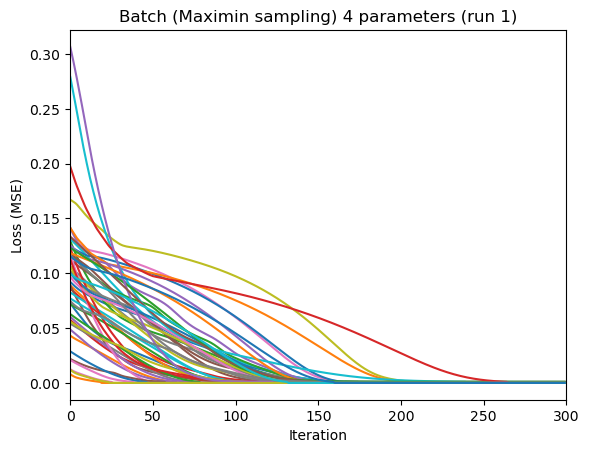

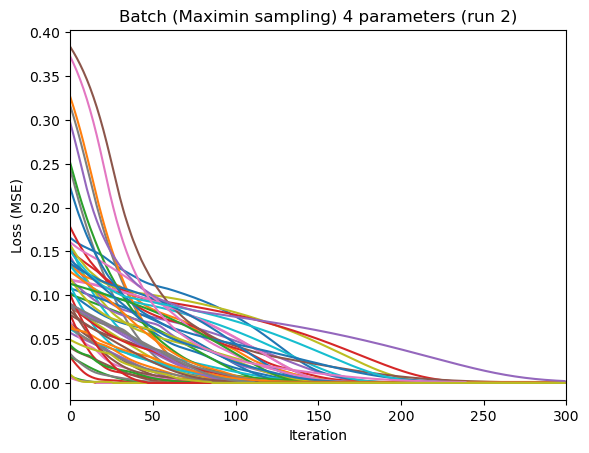

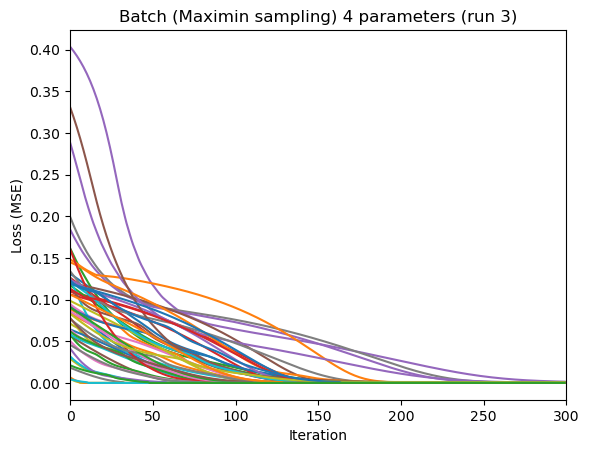

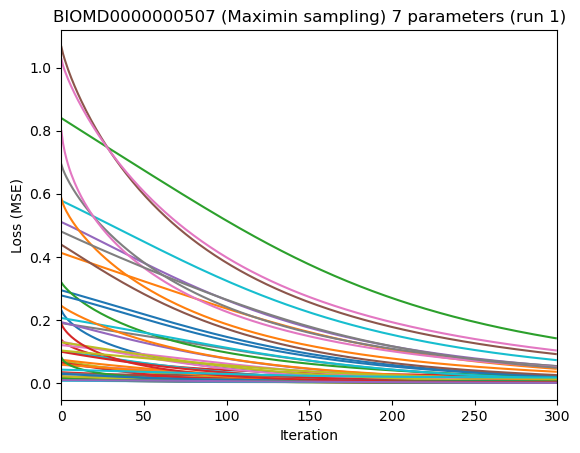

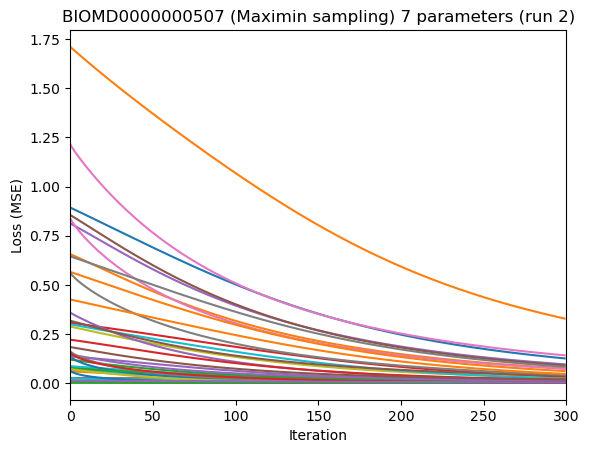

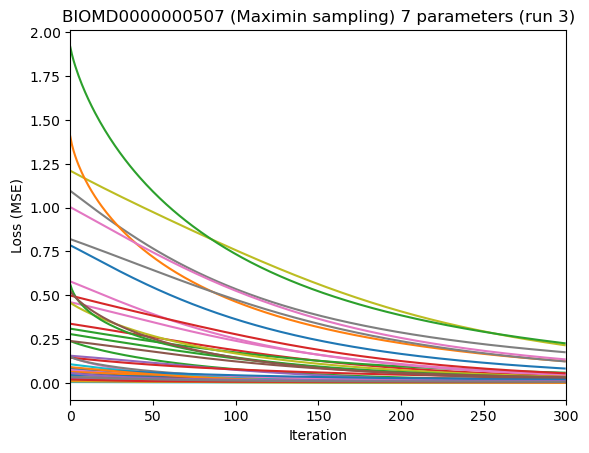

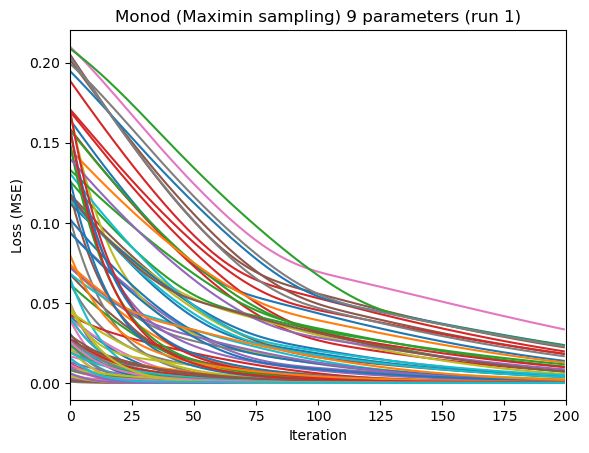

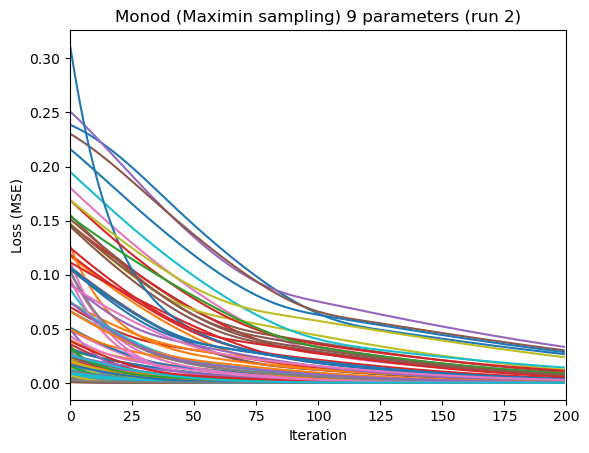

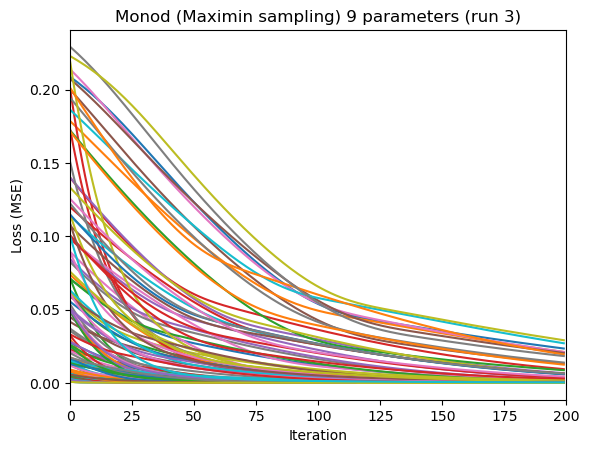

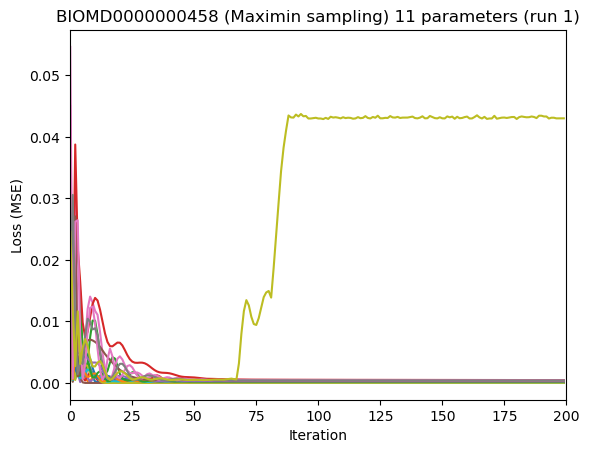

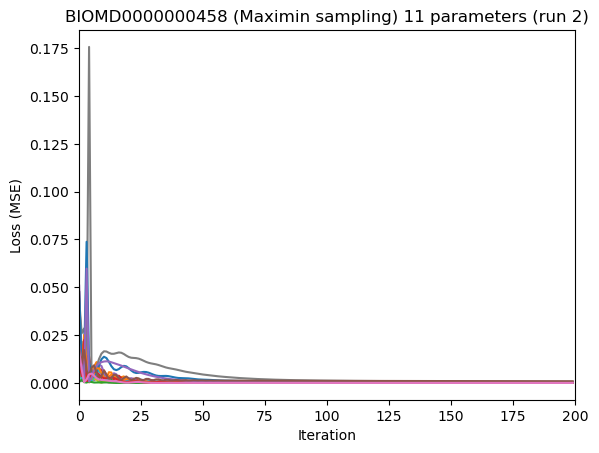

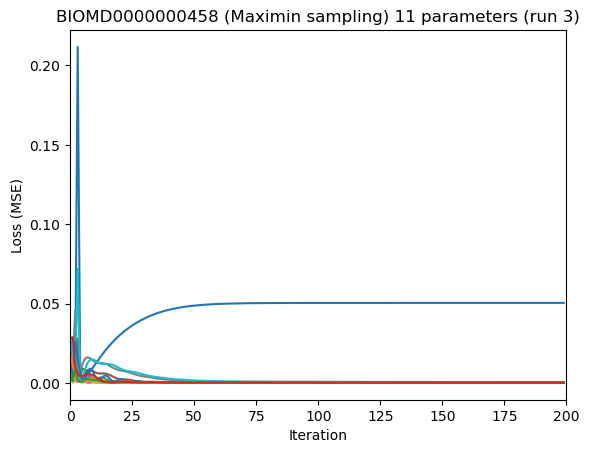

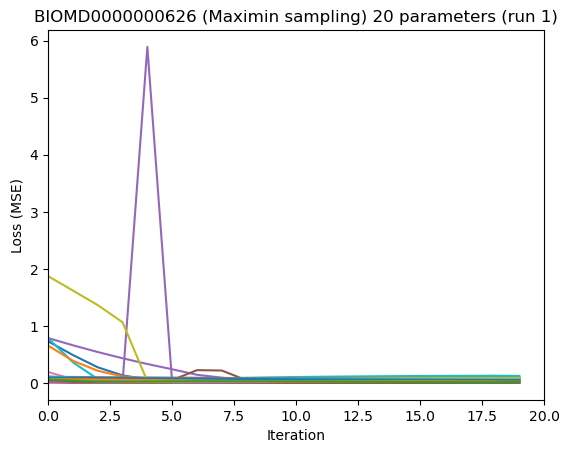

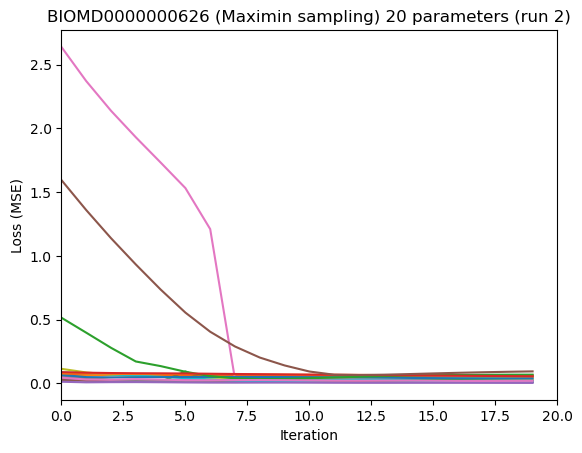

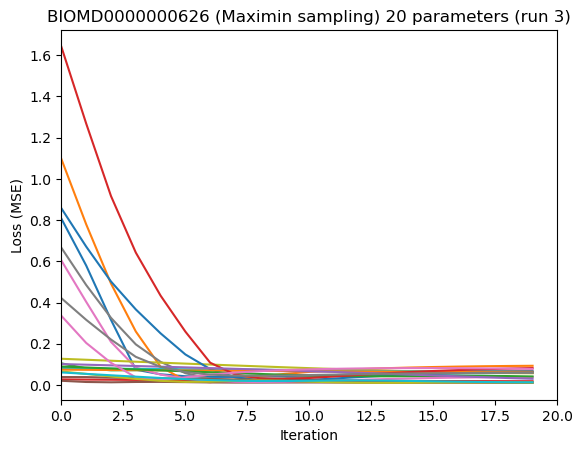

In [30]:

# 4 parameters
plot_loss_landscape(batch_run1_lpi_minimax.iloc[0:300,:],"Batch (Maximin sampling) 4 parameters (run 1)")
plot_loss_landscape(batch_run2_lpi_minimax.iloc[0:300,:],"Batch (Maximin sampling) 4 parameters (run 2)")
plot_loss_landscape(batch_run3_lpi_minimax.iloc[0:300,:],"Batch (Maximin sampling) 4 parameters (run 3)")

#  9 parameters
plot_loss_landscape(BIOMD0000000507_run1_lpi_minimax.iloc[0:300,:],"BIOMD0000000507 (Maximin sampling) 7 parameters (run 1)")
plot_loss_landscape(BIOMD0000000507_run2_lpi_minimax.iloc[0:300,:],"BIOMD0000000507 (Maximin sampling) 7 parameters (run 2)")
plot_loss_landscape(BIOMD0000000507_run3_lpi_minimax.iloc[0:300,:],"BIOMD0000000507 (Maximin sampling) 7 parameters (run 3)")


# 9 parameters
plot_loss_landscape(monod_run1_lpi_minimax.iloc[0:200,:],"Monod (Maximin sampling) 9 parameters (run 1)")
plot_loss_landscape(monod_run2_lpi_minimax.iloc[0:200,:],"Monod (Maximin sampling) 9 parameters (run 2)")
plot_loss_landscape(monod_run3_lpi_minimax.iloc[0:200,:],"Monod (Maximin sampling) 9 parameters (run 3)")

# 11 parameters
plot_loss_landscape(BIOMD0000000458_run1_lpi_minimax.iloc[0:200,:],"BIOMD0000000458 (Maximin sampling) 11 parameters (run 1)")
plot_loss_landscape(BIOMD0000000458_run2_lpi_minimax.iloc[0:200,:],"BIOMD0000000458 (Maximin sampling) 11 parameters (run 2)")
plot_loss_landscape(BIOMD0000000458_run3_lpi_minimax.iloc[0:200,:],"BIOMD0000000458 (Maximin sampling) 11 parameters (run 3)")


# 20 parameters
plot_loss_landscape(BIOMD0000000626_run1_lpi_minimax.iloc[0:20,:],"BIOMD0000000626 (Maximin sampling) 20 parameters (run 1)")
plot_loss_landscape(BIOMD0000000626_run2_lpi_minimax.iloc[0:20,:],"BIOMD0000000626 (Maximin sampling) 20 parameters (run 2)")
plot_loss_landscape(BIOMD0000000626_run3_lpi_minimax.iloc[0:20,:],"BIOMD0000000626 (Maximin sampling) 20 parameters (run 3)")

### Comparing sampling methods

In [31]:

#batch minimax
batch_run1_minimax_succes_ind=get_succes_rate(batch_run1_lpi_minimax,1e-3)
batch_run2_minimax_succes_ind=get_succes_rate(batch_run2_lpi_minimax,1e-3)
batch_run3_minimax_succes_ind=get_succes_rate(batch_run3_lpi_minimax,1e-3)

sucess_rates_batch_minimax=[len(batch_run1_minimax_succes_ind)/100,len(batch_run2_minimax_succes_ind)/100,len(batch_run3_minimax_succes_ind)/100]

batch_run1_uniform_succes_ind=get_succes_rate(batch_run1_lpi_uniform,1e-3)
batch_run2_uniform_succes_ind=get_succes_rate(batch_run2_lpi_uniform,1e-3)
batch_run3_uniform_succes_ind=get_succes_rate(batch_run3_lpi_uniform,1e-3)

sucess_rates_batch_uniform=[len(batch_run1_uniform_succes_ind)/100,len(batch_run2_uniform_succes_ind)/100,len(batch_run3_uniform_succes_ind)/100]

batch_run1_lhs_succes_ind=get_succes_rate(batch_run1_lpi_lhs,1e-3)
batch_run2_lhs_succes_ind=get_succes_rate(batch_run2_lpi_lhs,1e-3)
batch_run3_lhs_succes_ind=get_succes_rate(batch_run3_lpi_lhs,1e-3)

sucess_rates_batch_lhs=[len(batch_run1_lhs_succes_ind)/100,len(batch_run2_lhs_succes_ind)/100,len(batch_run3_lhs_succes_ind)/100]

print("Batch (4 parameters)")
print(sucess_rates_batch_uniform)
print(sucess_rates_batch_lhs)
print(sucess_rates_batch_minimax)



#BIOMD0000000507 minimax (7 parameter)
BIOMD0000000507_run1_minimax_succes_ind=get_succes_rate(BIOMD0000000507_run1_lpi_minimax,1e-3)
BIOMD0000000507_run2_minimax_succes_ind=get_succes_rate(BIOMD0000000507_run2_lpi_minimax,1e-3)
BIOMD0000000507_run3_minimax_succes_ind=get_succes_rate(BIOMD0000000507_run3_lpi_minimax,1e-3)

sucess_rates_BIOMD0000000507_minimax=[len(BIOMD0000000507_run1_minimax_succes_ind)/100,len(BIOMD0000000507_run2_minimax_succes_ind)/100,len(BIOMD0000000507_run3_minimax_succes_ind)/100]

BIOMD0000000507_run1_uniform_succes_ind=get_succes_rate(BIOMD0000000507_run1_lpi_uniform,1e-3)
BIOMD0000000507_run2_uniform_succes_ind=get_succes_rate(BIOMD0000000507_run2_lpi_uniform,1e-3)
BIOMD0000000507_run3_uniform_succes_ind=get_succes_rate(BIOMD0000000507_run3_lpi_uniform,1e-3)

sucess_rates_BIOMD0000000507_uniform=[len(BIOMD0000000507_run1_uniform_succes_ind)/100,len(BIOMD0000000507_run2_uniform_succes_ind)/100,len(BIOMD0000000507_run3_uniform_succes_ind)/100]

BIOMD0000000507_run1_lhs_succes_ind=get_succes_rate(BIOMD0000000507_run1_lpi_lhs,1e-3)
BIOMD0000000507_run2_lhs_succes_ind=get_succes_rate(BIOMD0000000507_run2_lpi_lhs,1e-3)
BIOMD0000000507_run3_lhs_succes_ind=get_succes_rate(BIOMD0000000507_run3_lpi_lhs,1e-3)

sucess_rates_BIOMD0000000507_lhs=[len(BIOMD0000000507_run1_lhs_succes_ind)/100,len(BIOMD0000000507_run2_lhs_succes_ind)/100,len(BIOMD0000000507_run3_lhs_succes_ind)/100]

print("BIOMD0000000507 (7 parameters)")
print(sucess_rates_BIOMD0000000507_uniform)
print(sucess_rates_BIOMD0000000507_lhs)
print(sucess_rates_BIOMD0000000507_minimax)



#monod minimax (9 parameter)
monod_run1_minimax_succes_ind=get_succes_rate(monod_run1_lpi_minimax,1e-3)
monod_run2_minimax_succes_ind=get_succes_rate(monod_run2_lpi_minimax,1e-3)
monod_run3_minimax_succes_ind=get_succes_rate(monod_run3_lpi_minimax,1e-3)

sucess_rates_monod_minimax=[len(monod_run1_minimax_succes_ind)/100,len(monod_run2_minimax_succes_ind)/100,len(monod_run3_minimax_succes_ind)/100]

monod_run1_uniform_succes_ind=get_succes_rate(monod_run1_lpi_uniform,1e-3)
monod_run2_uniform_succes_ind=get_succes_rate(monod_run2_lpi_uniform,1e-3)
monod_run3_uniform_succes_ind=get_succes_rate(monod_run3_lpi_uniform,1e-3)

sucess_rates_monod_uniform=[len(monod_run1_uniform_succes_ind)/100,len(monod_run2_uniform_succes_ind)/100,len(monod_run3_uniform_succes_ind)/100]

monod_run1_lhs_succes_ind=get_succes_rate(monod_run1_lpi_lhs,1e-3)
monod_run2_lhs_succes_ind=get_succes_rate(monod_run2_lpi_lhs,1e-3)
monod_run3_lhs_succes_ind=get_succes_rate(monod_run3_lpi_lhs,1e-3)

sucess_rates_monod_lhs=[len(monod_run1_lhs_succes_ind)/100,len(monod_run2_lhs_succes_ind)/100,len(monod_run3_lhs_succes_ind)/100]

print("Monod (9 parameters)")
print(sucess_rates_monod_uniform)
print(sucess_rates_monod_lhs)
print(sucess_rates_monod_minimax)

#BIOMD0000000458 minimax (11 parameter)
BIOMD0000000458_run1_minimax_succes_ind=get_succes_rate(BIOMD0000000458_run1_lpi_minimax,1e-3)
BIOMD0000000458_run2_minimax_succes_ind=get_succes_rate(BIOMD0000000458_run2_lpi_minimax,1e-3)
BIOMD0000000458_run3_minimax_succes_ind=get_succes_rate(BIOMD0000000458_run3_lpi_minimax,1e-3)

sucess_rates_BIOMD0000000458_minimax=[len(BIOMD0000000458_run1_minimax_succes_ind)/100,len(BIOMD0000000458_run2_minimax_succes_ind)/100,len(BIOMD0000000458_run3_minimax_succes_ind)/100]

BIOMD0000000458_run1_uniform_succes_ind=get_succes_rate(BIOMD0000000458_run1_lpi_uniform,1e-3)
BIOMD0000000458_run2_uniform_succes_ind=get_succes_rate(BIOMD0000000458_run2_lpi_uniform,1e-3)
BIOMD0000000458_run3_uniform_succes_ind=get_succes_rate(BIOMD0000000458_run3_lpi_uniform,1e-3)

sucess_rates_BIOMD0000000458_uniform=[len(BIOMD0000000458_run1_uniform_succes_ind)/100,len(BIOMD0000000458_run2_uniform_succes_ind)/100,len(BIOMD0000000458_run3_uniform_succes_ind)/100]

BIOMD0000000458_run1_lhs_succes_ind=get_succes_rate(BIOMD0000000458_run1_lpi_lhs,1e-3)
BIOMD0000000458_run2_lhs_succes_ind=get_succes_rate(BIOMD0000000458_run2_lpi_lhs,1e-3)
BIOMD0000000458_run3_lhs_succes_ind=get_succes_rate(BIOMD0000000458_run3_lpi_lhs,1e-3)

sucess_rates_BIOMD0000000458_lhs=[len(BIOMD0000000458_run1_lhs_succes_ind)/100,len(BIOMD0000000458_run2_lhs_succes_ind)/100,len(BIOMD0000000458_run3_lhs_succes_ind)/100]

print("BIOMD0000000458 (11 parameters)")
print(sucess_rates_BIOMD0000000458_uniform)
print(sucess_rates_BIOMD0000000458_lhs)
print(sucess_rates_BIOMD0000000458_minimax)



#BIOMD0000000626 minimax (20 parameter)
BIOMD0000000626_run1_minimax_succes_ind=get_succes_rate(BIOMD0000000626_run1_lpi_minimax,1e-3)
BIOMD0000000626_run2_minimax_succes_ind=get_succes_rate(BIOMD0000000626_run2_lpi_minimax,1e-3)
BIOMD0000000626_run3_minimax_succes_ind=get_succes_rate(BIOMD0000000626_run3_lpi_minimax,1e-3)

sucess_rates_BIOMD0000000626_minimax=[len(BIOMD0000000626_run1_minimax_succes_ind)/100,len(BIOMD0000000626_run2_minimax_succes_ind)/100,len(BIOMD0000000626_run3_minimax_succes_ind)/100]

BIOMD0000000626_run1_uniform_succes_ind=get_succes_rate(BIOMD0000000626_run1_lpi_uniform,1e-3)
BIOMD0000000626_run2_uniform_succes_ind=get_succes_rate(BIOMD0000000626_run2_lpi_uniform,1e-3)
BIOMD0000000626_run3_uniform_succes_ind=get_succes_rate(BIOMD0000000626_run3_lpi_uniform,1e-3)

sucess_rates_BIOMD0000000626_uniform=[len(BIOMD0000000626_run1_uniform_succes_ind)/100,len(BIOMD0000000626_run2_uniform_succes_ind)/100,len(BIOMD0000000626_run3_uniform_succes_ind)/100]

BIOMD0000000626_run1_lhs_succes_ind=get_succes_rate(BIOMD0000000626_run1_lpi_lhs,1e-3)
BIOMD0000000626_run2_lhs_succes_ind=get_succes_rate(BIOMD0000000626_run2_lpi_lhs,1e-3)
BIOMD0000000626_run3_lhs_succes_ind=get_succes_rate(BIOMD0000000626_run3_lpi_lhs,1e-3)

sucess_rates_BIOMD0000000626_lhs=[len(BIOMD0000000626_run1_lhs_succes_ind)/100,len(BIOMD0000000626_run2_lhs_succes_ind)/100,len(BIOMD0000000626_run3_lhs_succes_ind)/100]

print("BIOMD0000000626 (20 parameters)")
print(sucess_rates_BIOMD0000000626_uniform)
print(sucess_rates_BIOMD0000000626_lhs)
print(sucess_rates_BIOMD0000000626_minimax)

Batch (4 parameters)
[0.6, 0.54, 0.57]
[0.59, 0.56, 0.54]
[0.51, 0.59, 0.53]
BIOMD0000000507 (7 parameters)
[0.28, 0.27, 0.32]
[0.3, 0.34, 0.28]
[0.35, 0.33, 0.31]
Monod (9 parameters)
[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
BIOMD0000000458 (11 parameters)
[0.17, 0.24, 0.19]
[0.17, 0.19, 0.23]
[0.18, 0.17, 0.14]
BIOMD0000000626 (20 parameters)
[0.2, 0.22, 0.37]
[0.24, 0.08, 0.13]
[0.19, 0.12, 0.18]


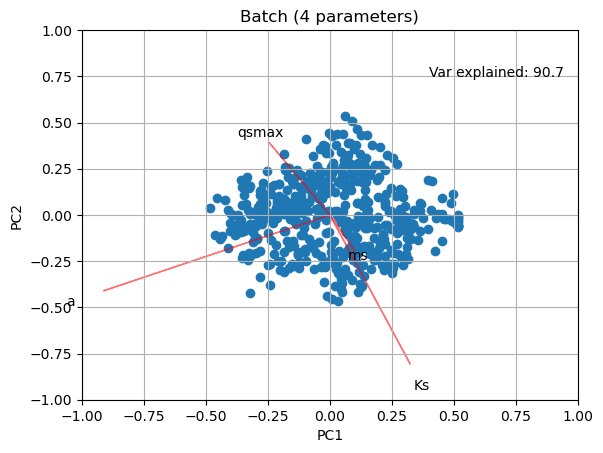

In [32]:
#Batch
batch_run1_params_uniform=get_files(file_location="../results/batch/uniform/",pattern="batch_run1_optim_param").dropna(axis=1)
batch_run1_params_uniform=batch_run1_params_uniform.iloc[:,batch_run1_uniform_succes_ind]
batch_run2_params_uniform=get_files(file_location="../results/batch/uniform/",pattern="batch_run2_optim_param").dropna(axis=1)
batch_run2_params_uniform=batch_run2_params_uniform.iloc[:,batch_run2_uniform_succes_ind]
batch_run3_params_uniform=get_files(file_location="../results/batch/uniform/",pattern="batch_run3_optim_param").dropna(axis=1)
batch_run3_params_uniform=batch_run3_params_uniform.iloc[:,batch_run3_uniform_succes_ind]

batch_run1_params_lhs=get_files(file_location="../results/batch/lhs/",pattern="batch_run1_optim_param").dropna(axis=1)
batch_run1_params_lhs=batch_run1_params_lhs.iloc[:,batch_run1_lhs_succes_ind]
batch_run2_params_lhs=get_files(file_location="../results/batch/lhs/",pattern="batch_run2_optim_param").dropna(axis=1)
batch_run2_params_lhs=batch_run2_params_lhs.iloc[:,batch_run2_lhs_succes_ind]
batch_run3_params_lhs=get_files(file_location="../results/batch/lhs/",pattern="batch_run3_optim_param").dropna(axis=1)
batch_run3_params_lhs=batch_run3_params_lhs.iloc[:,batch_run3_lhs_succes_ind]

batch_run1_params_minimax=get_files(file_location="../results/batch/minimax/",pattern="batch_run1_optim_param").dropna(axis=1)
batch_run1_params_minimax=batch_run1_params_minimax.iloc[:,batch_run1_minimax_succes_ind]
batch_run2_params_minimax=get_files(file_location="../results/batch/minimax/",pattern="batch_run2_optim_param").dropna(axis=1)
batch_run2_params_minimax=batch_run2_params_minimax.iloc[:,batch_run2_minimax_succes_ind]
batch_run3_params_minimax=get_files(file_location="../results/batch/minimax/",pattern="batch_run3_optim_param").dropna(axis=1)
batch_run3_params_minimax=batch_run3_params_minimax.iloc[:,batch_run3_minimax_succes_ind]


batch_runs_params=pd.concat([batch_run1_params_uniform,batch_run2_params_uniform,batch_run3_params_uniform,
                                     batch_run1_params_lhs,batch_run2_params_lhs,batch_run3_params_lhs,
                                     batch_run1_params_minimax,batch_run2_params_minimax,batch_run3_params_minimax],axis=1)

# # failed_monod=np.where(lhs_lpi_monod==-1)[1]
pca_batch=PCA(n_components=2)
x_batch=pca_batch.fit_transform(batch_runs_params.T)

var_explained_batch=sum(pca_batch.explained_variance_ratio_)
myplot(score=x_batch[:,0:2],
       coeff=np.transpose(pca_batch.components_[0:2, :]),
       labels=list(batch_runs_params.index),
       title="Batch (4 parameters)",
       var_explained=var_explained_batch)
plt.show()


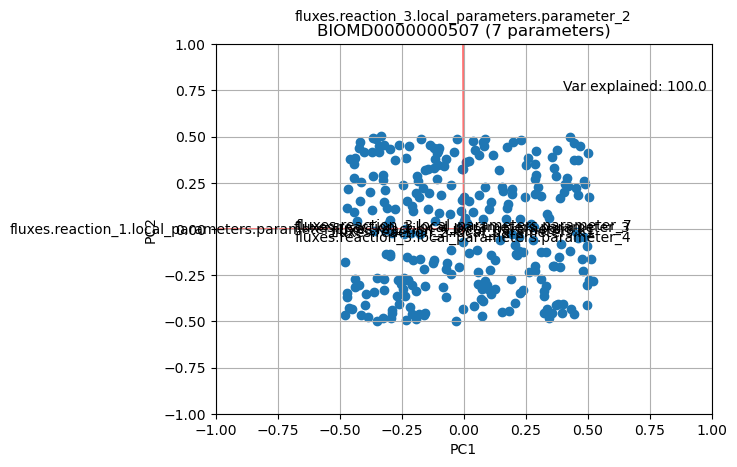

In [33]:
#BIOMD0000000507
BIOMD0000000507_run1_params_uniform=get_files(file_location="../results/BIOMD0000000507/uniform/",pattern="BIOMD0000000507_run1_optim_param").dropna(axis=1)
BIOMD0000000507_run1_params_uniform=BIOMD0000000507_run1_params_uniform.iloc[:,BIOMD0000000507_run1_uniform_succes_ind]
BIOMD0000000507_run2_params_uniform=get_files(file_location="../results/BIOMD0000000507/uniform/",pattern="BIOMD0000000507_run2_optim_param").dropna(axis=1)
BIOMD0000000507_run2_params_uniform=BIOMD0000000507_run2_params_uniform.iloc[:,BIOMD0000000507_run2_uniform_succes_ind]
BIOMD0000000507_run3_params_uniform=get_files(file_location="../results/BIOMD0000000507/uniform/",pattern="BIOMD0000000507_run3_optim_param").dropna(axis=1)
BIOMD0000000507_run3_params_uniform=BIOMD0000000507_run3_params_uniform.iloc[:,BIOMD0000000507_run3_uniform_succes_ind]

BIOMD0000000507_run1_params_lhs=get_files(file_location="../results/BIOMD0000000507/lhs/",pattern="BIOMD0000000507_run1_optim_param").dropna(axis=1)
BIOMD0000000507_run1_params_lhs=BIOMD0000000507_run1_params_lhs.iloc[:,BIOMD0000000507_run1_lhs_succes_ind]
BIOMD0000000507_run2_params_lhs=get_files(file_location="../results/BIOMD0000000507/lhs/",pattern="BIOMD0000000507_run2_optim_param").dropna(axis=1)
BIOMD0000000507_run2_params_lhs=BIOMD0000000507_run2_params_lhs.iloc[:,BIOMD0000000507_run2_lhs_succes_ind]
BIOMD0000000507_run3_params_lhs=get_files(file_location="../results/BIOMD0000000507/lhs/",pattern="BIOMD0000000507_run3_optim_param").dropna(axis=1)
BIOMD0000000507_run3_params_lhs=BIOMD0000000507_run3_params_lhs.iloc[:,BIOMD0000000507_run3_lhs_succes_ind]

BIOMD0000000507_run1_params_minimax=get_files(file_location="../results/BIOMD0000000507/minimax/",pattern="BIOMD0000000507_run1_optim_param").dropna(axis=1)
BIOMD0000000507_run1_params_minimax=BIOMD0000000507_run1_params_minimax.iloc[:,BIOMD0000000507_run1_minimax_succes_ind]
BIOMD0000000507_run2_params_minimax=get_files(file_location="../results/BIOMD0000000507/minimax/",pattern="BIOMD0000000507_run2_optim_param").dropna(axis=1)
BIOMD0000000507_run2_params_minimax=BIOMD0000000507_run2_params_minimax.iloc[:,BIOMD0000000507_run2_minimax_succes_ind]
BIOMD0000000507_run3_params_minimax=get_files(file_location="../results/BIOMD0000000507/minimax/",pattern="BIOMD0000000507_run3_optim_param").dropna(axis=1)
BIOMD0000000507_run3_params_minimax=BIOMD0000000507_run3_params_minimax.iloc[:,BIOMD0000000507_run3_minimax_succes_ind]


BIOMD0000000507_runs_params=pd.concat([BIOMD0000000507_run1_params_uniform,BIOMD0000000507_run2_params_uniform,BIOMD0000000507_run3_params_uniform,
                                     BIOMD0000000507_run1_params_lhs,BIOMD0000000507_run2_params_lhs,BIOMD0000000507_run3_params_lhs,
                                     BIOMD0000000507_run1_params_minimax,BIOMD0000000507_run2_params_minimax,BIOMD0000000507_run3_params_minimax],axis=1)

# # failed_BIOMD0000000507=np.where(lhs_lpi_BIOMD0000000507==-1)[1]
pca_BIOMD0000000507=PCA(n_components=2)
x_BIOMD0000000507=pca_BIOMD0000000507.fit_transform(BIOMD0000000507_runs_params.T)

var_explained_BIOMD0000000507=sum(pca_BIOMD0000000507.explained_variance_ratio_)
myplot(score=x_BIOMD0000000507[:,0:2],
       coeff=np.transpose(pca_BIOMD0000000507.components_[0:2, :]),
       labels=list(BIOMD0000000507_runs_params.index),
       title="BIOMD0000000507 (7 parameters)",
       var_explained=var_explained_BIOMD0000000507)

plt.show()




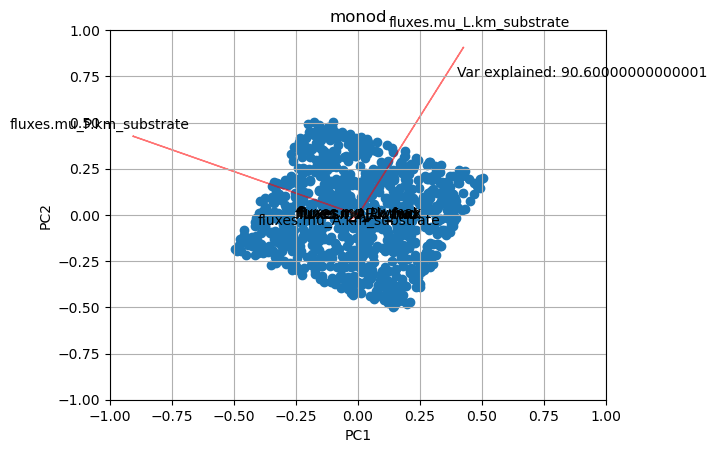

In [34]:
#monod
monod_run1_params_uniform=get_files(file_location="../results/monod/uniform/",pattern="monod_uni_run2_optim_param").dropna(axis=1)
monod_run1_params_uniform=monod_run1_params_uniform.iloc[:,monod_run1_uniform_succes_ind]
monod_run2_params_uniform=get_files(file_location="../results/monod/uniform/",pattern="monod_uni_run3_optim_param").dropna(axis=1)
monod_run2_params_uniform=monod_run2_params_uniform.iloc[:,monod_run2_uniform_succes_ind]
monod_run3_params_uniform=get_files(file_location="../results/monod/uniform/",pattern="monod_uni_run4_optim_param").dropna(axis=1)
monod_run3_params_uniform=monod_run3_params_uniform.iloc[:,monod_run3_uniform_succes_ind]

monod_run1_params_lhs=get_files(file_location="../results/monod/lhs/",pattern="monod_run2_optim_param").dropna(axis=1)
monod_run1_params_lhs=monod_run1_params_lhs.iloc[:,monod_run1_lhs_succes_ind]
monod_run2_params_lhs=get_files(file_location="../results/monod/lhs/",pattern="monod_run3_optim_param").dropna(axis=1)
monod_run2_params_lhs=monod_run2_params_lhs.iloc[:,monod_run2_lhs_succes_ind]
monod_run3_params_lhs=get_files(file_location="../results/monod/lhs/",pattern="monod_run4_optim_param").dropna(axis=1)
monod_run3_params_lhs=monod_run3_params_lhs.iloc[:,monod_run3_lhs_succes_ind]

monod_run1_params_minimax=get_files(file_location="../results/monod/minimax/",pattern="monod_run2_optim_param").dropna(axis=1)
monod_run1_params_minimax=monod_run1_params_minimax.iloc[:,monod_run1_minimax_succes_ind]
monod_run2_params_minimax=get_files(file_location="../results/monod/minimax/",pattern="monod_run4_optim_param").dropna(axis=1)
monod_run2_params_minimax=monod_run2_params_minimax.iloc[:,monod_run2_minimax_succes_ind]
monod_run3_params_minimax=get_files(file_location="../results/monod/minimax/",pattern="monod_run5_optim_param").dropna(axis=1)
monod_run3_params_minimax=monod_run3_params_minimax.iloc[:,monod_run3_minimax_succes_ind]


monod_runs_params=pd.concat([monod_run1_params_uniform,monod_run2_params_uniform,monod_run3_params_uniform,
                                     monod_run1_params_lhs,monod_run2_params_lhs,monod_run3_params_lhs,
                                     monod_run1_params_minimax,monod_run2_params_minimax,monod_run3_params_minimax],axis=1)

# # failed_monod=np.where(lhs_lpi_monod==-1)[1]
pca_monod=PCA(n_components=2)
x_monod=pca_monod.fit_transform(monod_runs_params.T)

var_explained_monod=sum(pca_monod.explained_variance_ratio_)
myplot(score=x_monod[:,0:2],
       coeff=np.transpose(pca_monod.components_[0:2, :]),
       labels=list(monod_runs_params.index),
       title="monod",
       var_explained=var_explained_monod)
plt.show()


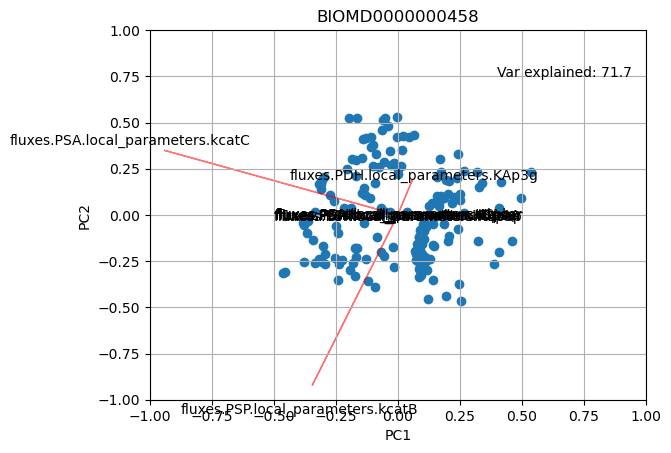

In [35]:
#BIOMD0000000458
BIOMD0000000458_run1_params_uniform=get_files(file_location="../results/BIOMD0000000458/uniform/",pattern="BIOMD0000000458_run1_optim_param").dropna(axis=1)
BIOMD0000000458_run1_params_uniform=BIOMD0000000458_run1_params_uniform.iloc[:,BIOMD0000000458_run1_uniform_succes_ind]
BIOMD0000000458_run2_params_uniform=get_files(file_location="../results/BIOMD0000000458/uniform/",pattern="BIOMD0000000458_run2_optim_param").dropna(axis=1)
BIOMD0000000458_run2_params_uniform=BIOMD0000000458_run2_params_uniform.iloc[:,BIOMD0000000458_run2_uniform_succes_ind]
BIOMD0000000458_run3_params_uniform=get_files(file_location="../results/BIOMD0000000458/uniform/",pattern="BIOMD0000000458_run3_optim_param").dropna(axis=1)
BIOMD0000000458_run3_params_uniform=BIOMD0000000458_run3_params_uniform.iloc[:,BIOMD0000000458_run3_uniform_succes_ind]

BIOMD0000000458_run1_params_lhs=get_files(file_location="../results/BIOMD0000000458/lhs/",pattern="BIOMD0000000458_run1_optim_param").dropna(axis=1)
BIOMD0000000458_run1_params_lhs=BIOMD0000000458_run1_params_lhs.iloc[:,BIOMD0000000458_run1_lhs_succes_ind]
BIOMD0000000458_run2_params_lhs=get_files(file_location="../results/BIOMD0000000458/lhs/",pattern="BIOMD0000000458_run2_optim_param").dropna(axis=1)
BIOMD0000000458_run2_params_lhs=BIOMD0000000458_run2_params_lhs.iloc[:,BIOMD0000000458_run2_lhs_succes_ind]
BIOMD0000000458_run3_params_lhs=get_files(file_location="../results/BIOMD0000000458/lhs/",pattern="BIOMD0000000458_run3_optim_param").dropna(axis=1)
BIOMD0000000458_run3_params_lhs=BIOMD0000000458_run3_params_lhs.iloc[:,BIOMD0000000458_run3_lhs_succes_ind]

BIOMD0000000458_run1_params_minimax=get_files(file_location="../results/BIOMD0000000458/minimax/",pattern="BIOMD0000000458_run1_optim_param").dropna(axis=1)
BIOMD0000000458_run1_params_minimax=BIOMD0000000458_run1_params_minimax.iloc[:,BIOMD0000000458_run1_minimax_succes_ind]
BIOMD0000000458_run2_params_minimax=get_files(file_location="../results/BIOMD0000000458/minimax/",pattern="BIOMD0000000458_run2_optim_param").dropna(axis=1)
BIOMD0000000458_run2_params_minimax=BIOMD0000000458_run2_params_minimax.iloc[:,BIOMD0000000458_run2_minimax_succes_ind]
BIOMD0000000458_run3_params_minimax=get_files(file_location="../results/BIOMD0000000458/minimax/",pattern="BIOMD0000000458_run3_optim_param").dropna(axis=1)
BIOMD0000000458_run3_params_minimax=BIOMD0000000458_run3_params_minimax.iloc[:,BIOMD0000000458_run3_minimax_succes_ind]


BIOMD0000000458_runs_params=pd.concat([BIOMD0000000458_run1_params_uniform,BIOMD0000000458_run2_params_uniform,BIOMD0000000458_run3_params_uniform,
                                     BIOMD0000000458_run1_params_lhs,BIOMD0000000458_run2_params_lhs,BIOMD0000000458_run3_params_lhs,
                                     BIOMD0000000458_run1_params_minimax,BIOMD0000000458_run2_params_minimax,BIOMD0000000458_run3_params_minimax],axis=1)

# failed_BIOMD0000000458=np.where(lhs_lpi_BIOMD0000000458==-1)[1]
pca_BIOMD0000000458=PCA(n_components=2)
x_BIOMD0000000458=pca_BIOMD0000000458.fit_transform(BIOMD0000000458_runs_params.T)

var_explained_BIOMD0000000458=sum(pca_BIOMD0000000458.explained_variance_ratio_)
myplot(score=x_BIOMD0000000458[:,0:2],
       coeff=np.transpose(pca_BIOMD0000000458.components_[0:2, :]),
       labels=list(BIOMD0000000458_runs_params.index),
       title="BIOMD0000000458",
       var_explained=var_explained_BIOMD0000000458)

plt.show()



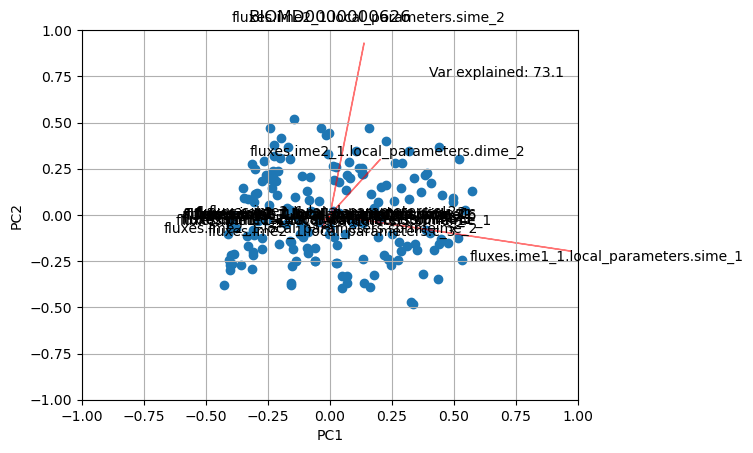

In [36]:
#BIOMD0000000626
BIOMD0000000626_run1_params_uniform=get_files(file_location="../results/BIOMD0000000626/uniform/",pattern="BIOMD0000000626_run1_optim_param").dropna(axis=1)
BIOMD0000000626_run1_params_uniform=BIOMD0000000626_run1_params_uniform.iloc[:,BIOMD0000000626_run1_uniform_succes_ind]
BIOMD0000000626_run2_params_uniform=get_files(file_location="../results/BIOMD0000000626/uniform/",pattern="BIOMD0000000626_run2_optim_param").dropna(axis=1)
BIOMD0000000626_run2_params_uniform=BIOMD0000000626_run2_params_uniform.iloc[:,BIOMD0000000626_run2_uniform_succes_ind]
BIOMD0000000626_run3_params_uniform=get_files(file_location="../results/BIOMD0000000626/uniform/",pattern="BIOMD0000000626_run3_optim_param").dropna(axis=1)
BIOMD0000000626_run3_params_uniform=BIOMD0000000626_run3_params_uniform.iloc[:,BIOMD0000000626_run3_uniform_succes_ind]

BIOMD0000000626_run1_params_lhs=get_files(file_location="../results/BIOMD0000000626/lhs/",pattern="BIOMD0000000626_run1_optim_param").dropna(axis=1)
BIOMD0000000626_run1_params_lhs=BIOMD0000000626_run1_params_lhs.iloc[:,BIOMD0000000626_run1_lhs_succes_ind]
BIOMD0000000626_run2_params_lhs=get_files(file_location="../results/BIOMD0000000626/lhs/",pattern="BIOMD0000000626_run2_optim_param").dropna(axis=1)
BIOMD0000000626_run2_params_lhs=BIOMD0000000626_run2_params_lhs.iloc[:,BIOMD0000000626_run2_lhs_succes_ind]
BIOMD0000000626_run3_params_lhs=get_files(file_location="../results/BIOMD0000000626/lhs/",pattern="BIOMD0000000626_run3_optim_param").dropna(axis=1)
BIOMD0000000626_run3_params_lhs=BIOMD0000000626_run3_params_lhs.iloc[:,BIOMD0000000626_run3_lhs_succes_ind]

BIOMD0000000626_run1_params_minimax=get_files(file_location="../results/BIOMD0000000626/minimax/",pattern="BIOMD0000000626_run1_optim_param").dropna(axis=1)
BIOMD0000000626_run1_params_minimax=BIOMD0000000626_run1_params_minimax.iloc[:,BIOMD0000000626_run1_minimax_succes_ind]
BIOMD0000000626_run2_params_minimax=get_files(file_location="../results/BIOMD0000000626/minimax/",pattern="BIOMD0000000626_run2_optim_param").dropna(axis=1)
BIOMD0000000626_run2_params_minimax=BIOMD0000000626_run2_params_minimax.iloc[:,BIOMD0000000626_run2_minimax_succes_ind]
BIOMD0000000626_run3_params_minimax=get_files(file_location="../results/BIOMD0000000626/minimax/",pattern="BIOMD0000000626_run3_optim_param").dropna(axis=1)
BIOMD0000000626_run3_params_minimax=BIOMD0000000626_run3_params_minimax.iloc[:,BIOMD0000000626_run3_minimax_succes_ind]


BIOMD0000000626_runs_params=pd.concat([BIOMD0000000626_run1_params_uniform,BIOMD0000000626_run2_params_uniform,BIOMD0000000626_run3_params_uniform,
                                     BIOMD0000000626_run1_params_lhs,BIOMD0000000626_run2_params_lhs,BIOMD0000000626_run3_params_lhs,
                                     BIOMD0000000626_run1_params_minimax,BIOMD0000000626_run2_params_minimax,BIOMD0000000626_run3_params_minimax],axis=1)

# failed_BIOMD0000000626=np.where(lhs_lpi_BIOMD0000000626==-1)[1]
pca_BIOMD0000000626=PCA(n_components=2)
x_BIOMD0000000626=pca_BIOMD0000000626.fit_transform(BIOMD0000000626_runs_params.T)

var_explained_BIOMD0000000626=sum(pca_BIOMD0000000626.explained_variance_ratio_)
myplot(score=x_BIOMD0000000626[:,0:2],
       coeff=np.transpose(pca_BIOMD0000000626.components_[0:2, :]),
       labels=list(BIOMD0000000626_runs_params.index),
       title="BIOMD0000000626",
       var_explained=var_explained_BIOMD0000000626)

plt.show()



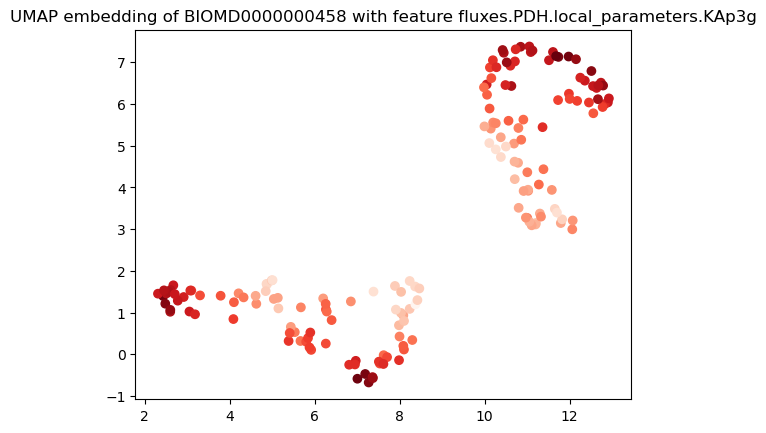

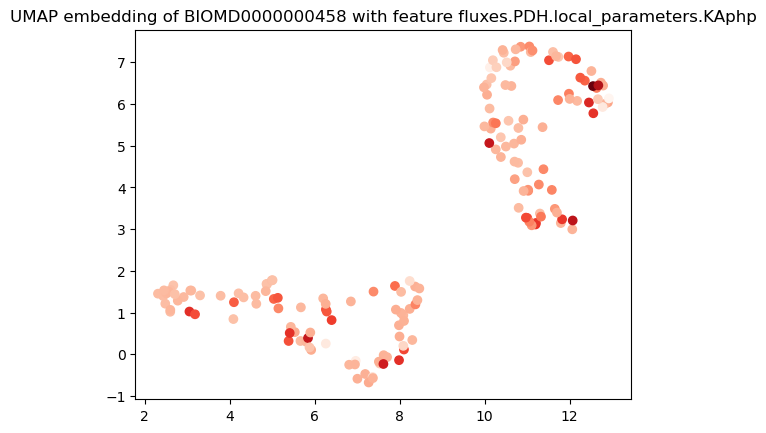

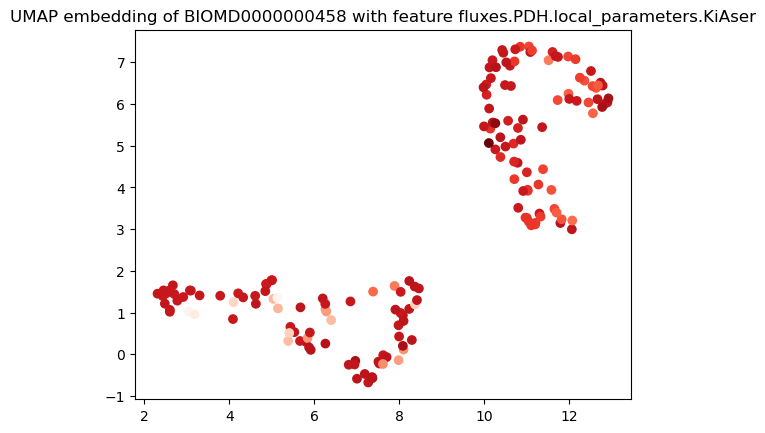

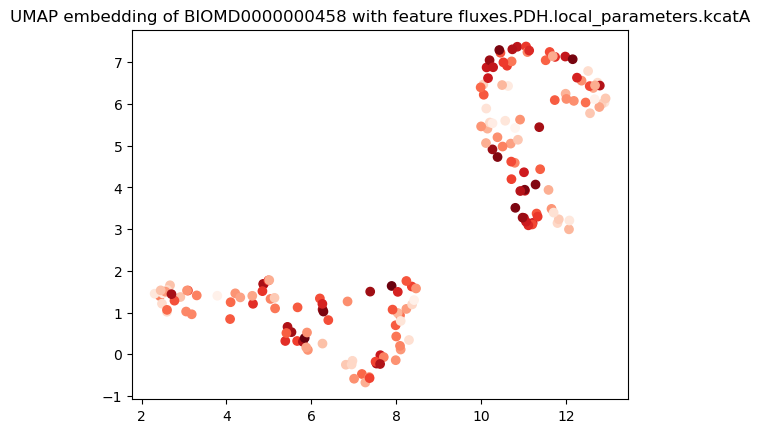

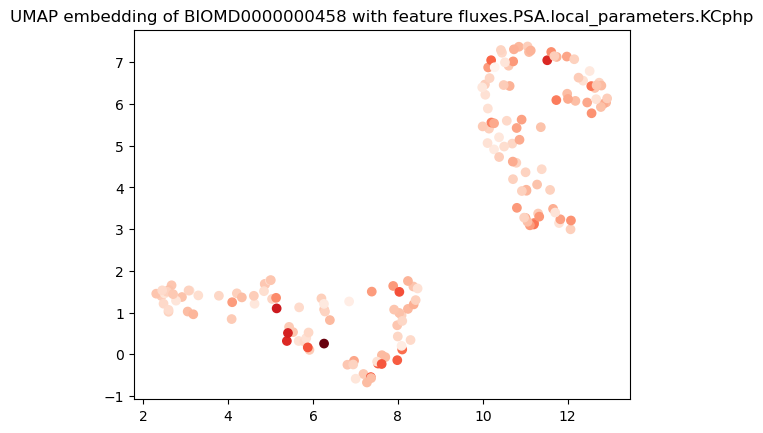

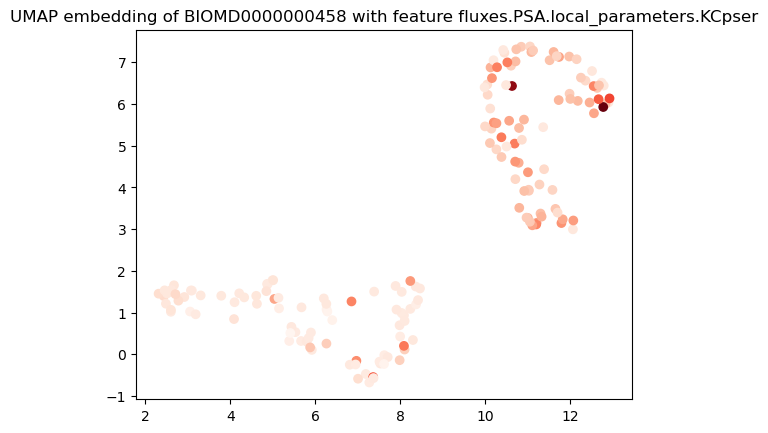

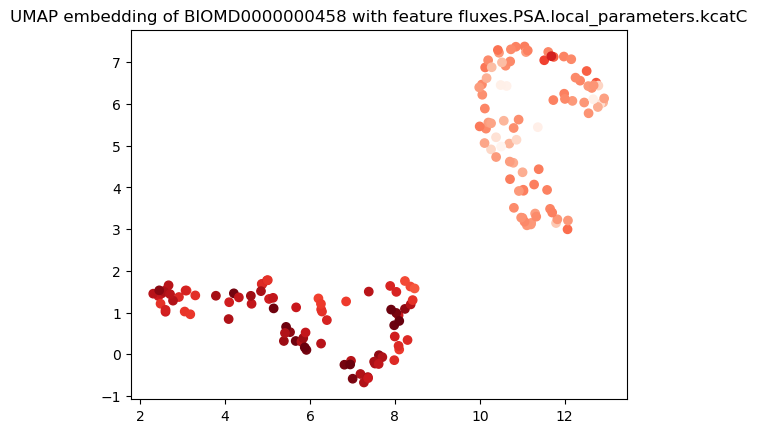

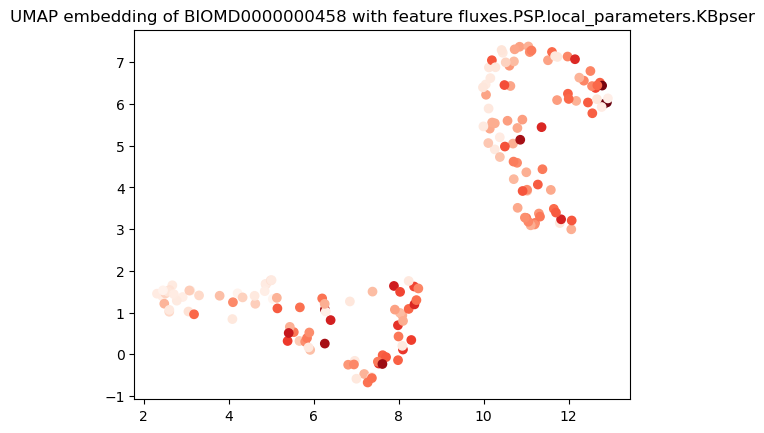

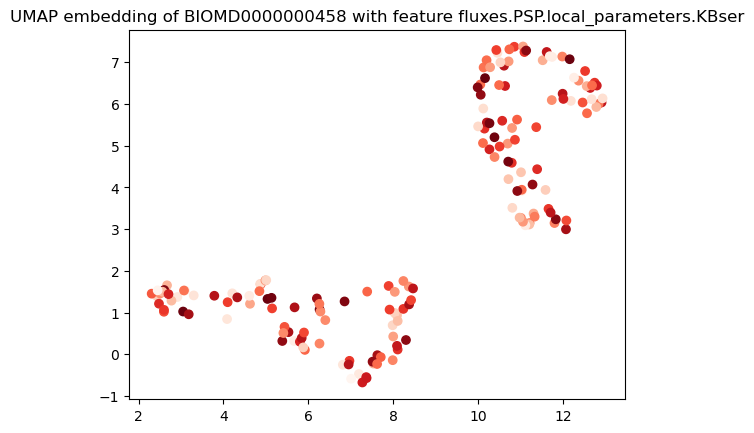

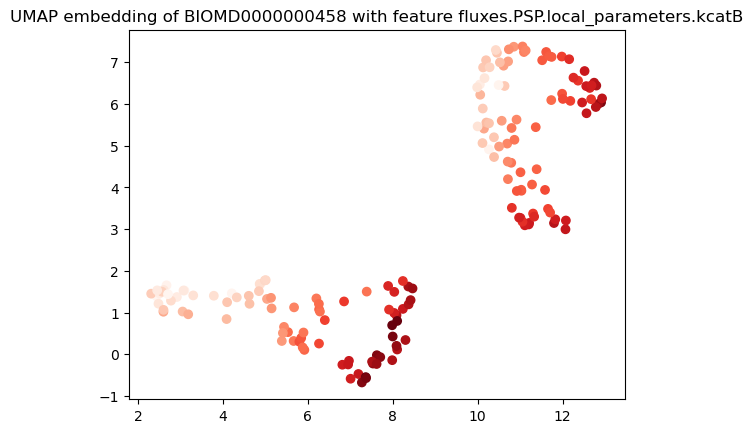

In [79]:
import umap
reducer=umap.UMAP()
embedding=reducer.fit_transform(BIOMD0000000458_runs_params.T)


for i in range(np.shape(BIOMD0000000458_runs_params)[0]):
    plt.scatter(embedding[:, 0],embedding[:, 1],c=BIOMD0000000458_runs_params.iloc[i,:],cmap="Reds")
    plt.title("UMAP embedding of BIOMD0000000458 with feature "+str(BIOMD0000000458_runs_params.index[i]))

    plt.show()

# BIOMD0000000458_runs_params

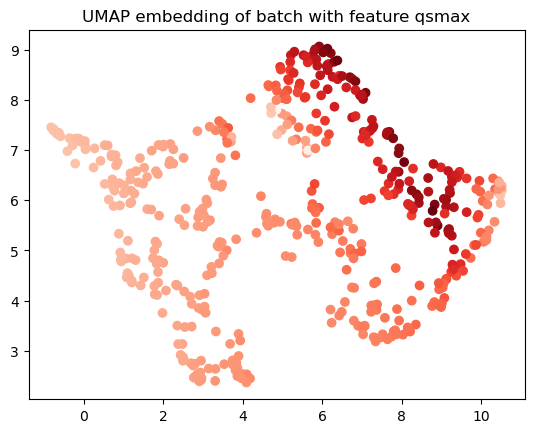

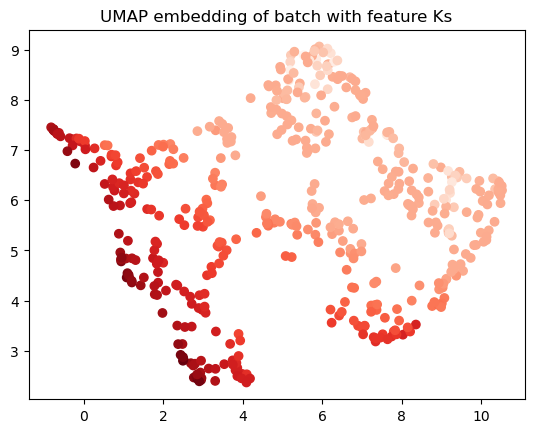

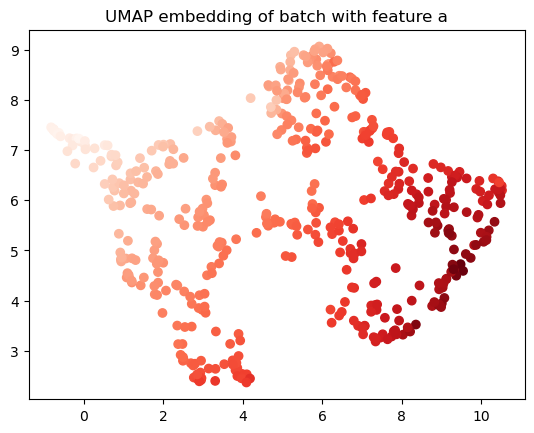

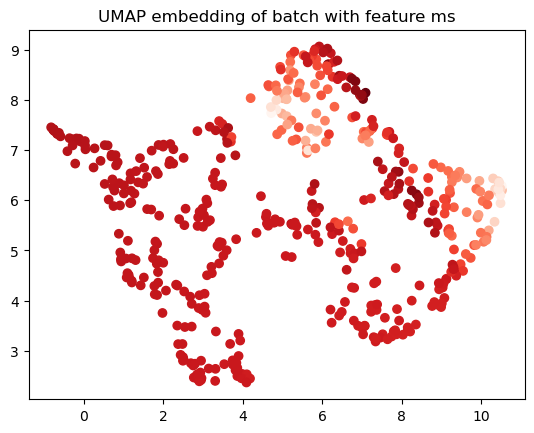

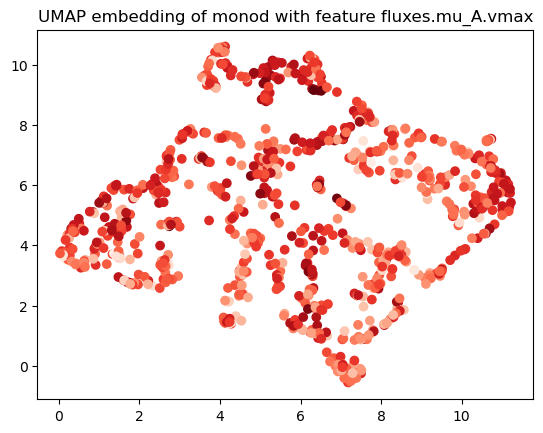

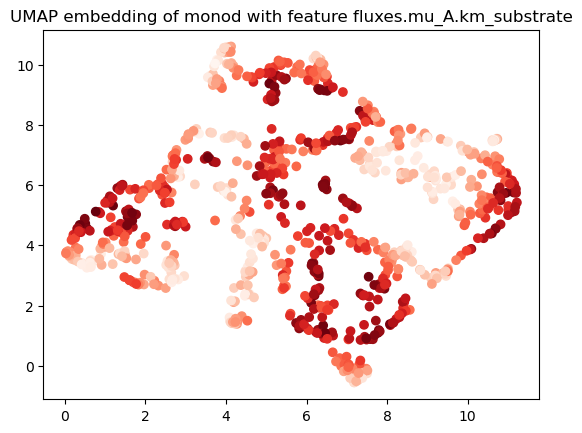

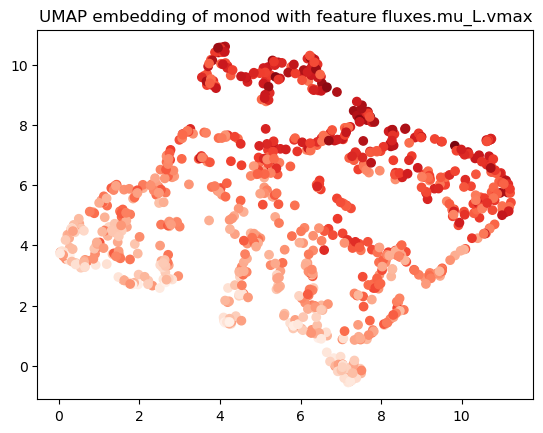

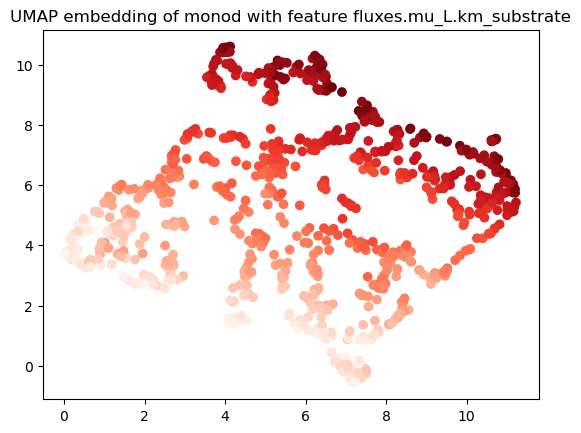

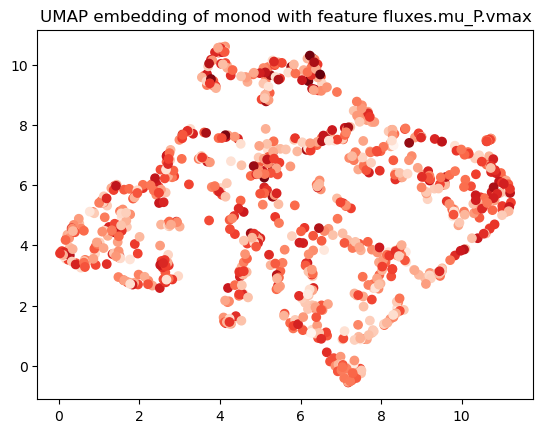

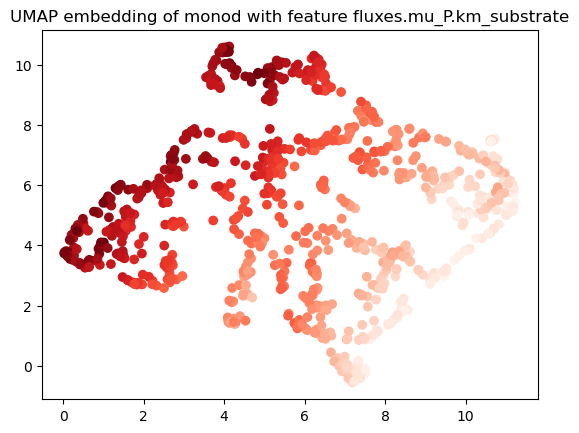

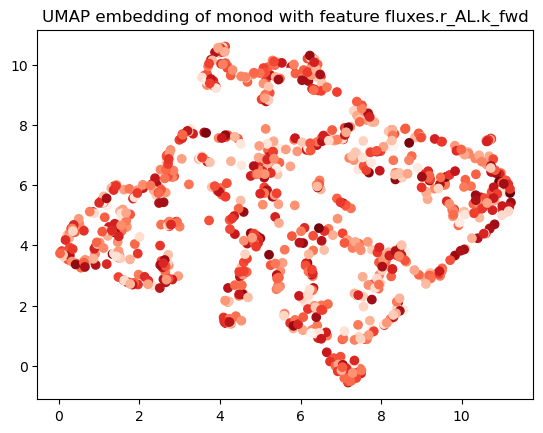

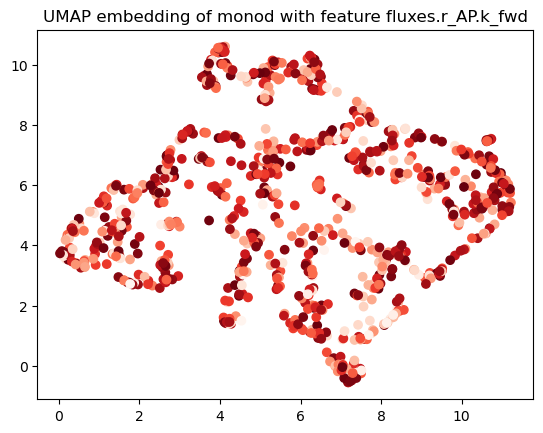

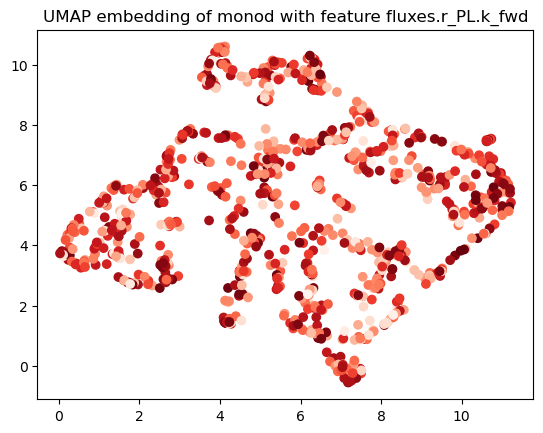

In [74]:

import umap
reducer=umap.UMAP(n_neighbors=30)
embedding=reducer.fit_transform(batch_runs_params.T)


for i in range(np.shape(batch_runs_params)[0]):
    plt.scatter(embedding[:, 0],embedding[:, 1],c=batch_runs_params.iloc[i,:],cmap="Reds")
    plt.title("UMAP embedding of batch with feature "+str(batch_runs_params.index[i]))
    plt.show()





# import umap
# reducer=umap.UMAP()
# embedding=reducer.fit_transform(monod_runs_params.T)


# for i in range(np.shape(monod_runs_params)[0]):
#     plt.scatter(embedding[:, 0],embedding[:, 1],c=monod_runs_params.iloc[i,:],cmap="Reds")
#     plt.title("UMAP embedding of monod with feature "+str(monod_runs_params.index[i]))
#     plt.show()